## Implement Logistic Regression

#### Import required dependecies

In [417]:
import numpy as np                               #for numerical operations
import matplotlib.pyplot as plt                  #for data visualisation
from sklearn.datasets import load_breast_cancer  #load data from scikit learn datasets
import warnings                                  #ignore warning
warnings.filterwarnings('ignore')                #suppress warnings


In [418]:
x, y = load_breast_cancer(return_X_y= True)      #load data from scikit learn datasets

In [419]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(x)
x = model.transform(x)


In [420]:
x_b = np.c_[np.ones((x.shape[0], 1)), x]         #add bias x0 = 1
y = y.reshape(-1, 1)

In [421]:
theta = np.random.rand(x_b.shape[1], 1)                     #initiate random theta
n_iteration = 1000                                  #number of iterations
eta = 0.35                                             #learning rate
for i in range(n_iteration):                                #iterate over number of iteration
    z = x_b.dot(theta)                                      #calculate prediction
    sigmoid = 1/(1 + np.exp(-z))                            #calculate sigmoid
    gradient = x_b.T.dot(sigmoid - y)/x.shape[0]            #calculate gradient
    theta -= eta * gradient                                 #calculate best theta


In [422]:
z = x_b.dot(theta)                                      #multiply best theta with input value
y_predict = 1/(1 + np.exp(-z))                          #calculate sigmoid
y_predict = y_predict[np.where(y_predict > 0.5)]        #get only value which have predicted value greter than 0.5                   
# y_predict

In [423]:
x_values = np.array([min(x_b[:,2]) -1, max(x_b[:, 2]) + 1])
x_values.shape

(2,)

In [424]:
y_values = -(theta[0] + theta[1] * x_values) / theta[2]
y_values.shape

(2,)

Text(0.5, 1.0, 'Decision Boundry of Logistic Regression on Breast Cancer Dataset')

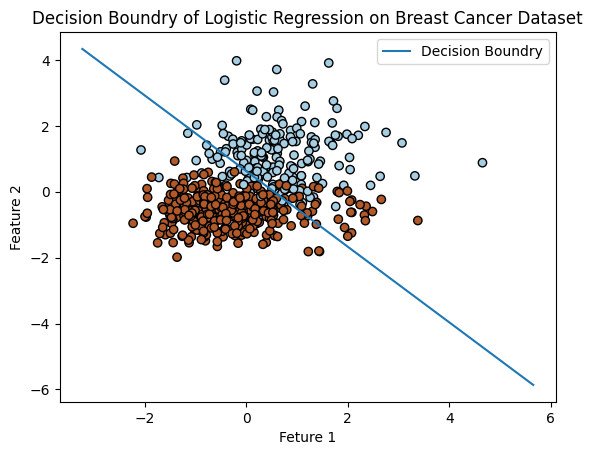

In [425]:
plt.scatter(x[:,1], x[:, 2], c = y, cmap = plt.cm.Paired, edgecolors= 'k')
plt.plot(x_values, y_values, label = 'Decision Boundry')
plt.xlabel('Feture 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundry of Logistic Regression on Breast Cancer Dataset')